In [6]:
# Imports
from functions import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [7]:
housing = pd.read_csv('./data/Housing.csv')
housing_columns = housing.columns
housing_arr = housing.to_numpy()

In [8]:
conditions = [housing_arr == "no", housing_arr == "yes", housing_arr == 'furnished', housing_arr == 'semi-furnished', housing_arr == 'unfurnished']
values = [0, 1, 2, 1, 0]

housing_arr = np.select(conditions, values, housing_arr).astype('int')

In [9]:
housing_arr = standardize_data(housing_arr)

In [10]:
trials = 250
results = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials),
              simulate(IterativeImputer(random_state=0), housing_arr, trials)
             ]).T
results.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

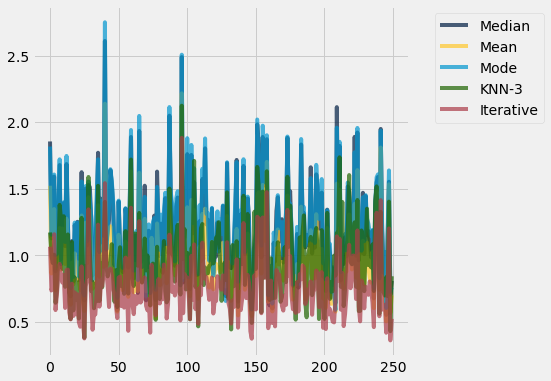

In [11]:
results_table = Table.from_df(results)
results_table.plot()

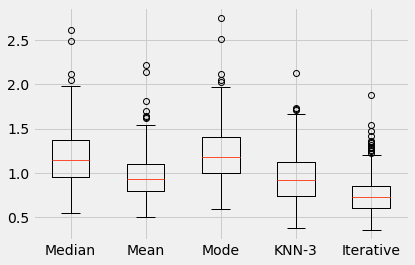

In [12]:
results_table.boxplot()

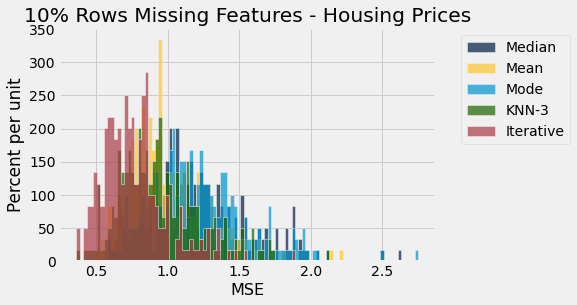

In [13]:
results_table.hist(bins=100)
plt.title('10% Rows Missing Features - Housing Prices')
plt.xlabel('MSE')
plt.show()

In [14]:
trials = 250
results_2 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials,percent_missing=.5), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials,percent_missing=.5),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials,percent_missing=.5),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials,percent_missing=.5),
              simulate(IterativeImputer(random_state=0), housing_arr, trials,percent_missing=.5)
             ]).T
results_2.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

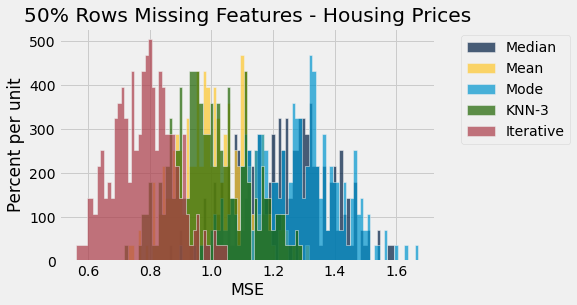

In [15]:
results_table_2 = Table.from_df(results_2)
results_table_2.hist(bins=100)
plt.title('50% Rows Missing Features - Housing Prices')
plt.xlabel('MSE')
plt.show()

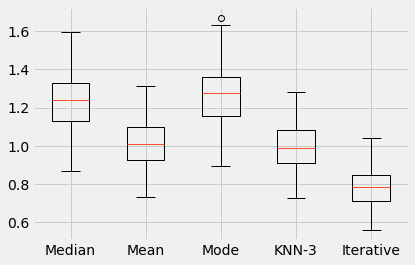

In [16]:
results_table_2.boxplot()

In [17]:
trials = 250
results_3 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials,remove_random_features_row_independent,.10), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials, remove_random_features_row_independent, .10),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials, remove_random_features_row_independent, .10),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials, remove_random_features_row_independent, .10),
              simulate(IterativeImputer(random_state=0), housing_arr, trials, remove_random_features_row_independent, .10)
             ]).T
results_3.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

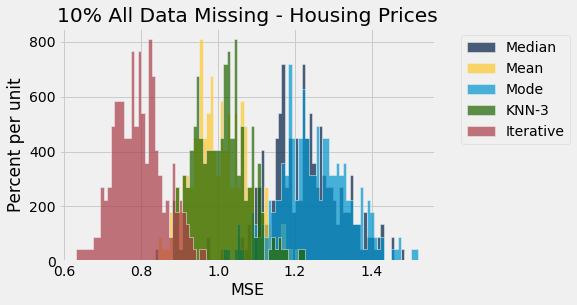

In [18]:
results_table_3 = Table.from_df(results_3)
results_table_3.hist(bins=100)
plt.title('10% All Data Missing - Housing Prices')
plt.xlabel('MSE')
plt.show()

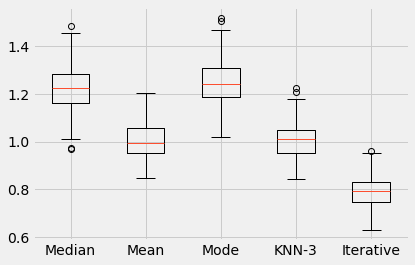

In [19]:
results_table_3.boxplot()

In [20]:
trials = 250
results_4 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials,remove_random_features_row_independent,.20), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials, remove_random_features_row_independent, .20),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials, remove_random_features_row_independent, .20),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials, remove_random_features_row_independent, .20),
              simulate(IterativeImputer(random_state=0), housing_arr, trials, remove_random_features_row_independent, .20)
             ]).T
results_4.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

c:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\impute\_iterat

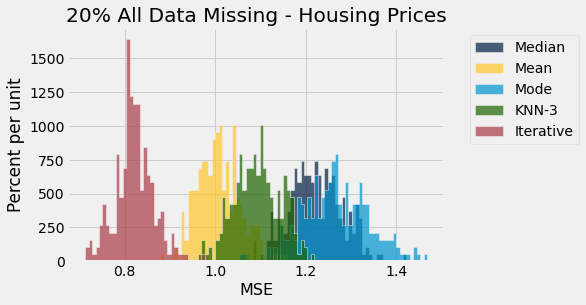

In [21]:
results_table_4 = Table.from_df(results_4)
results_table_4.hist(bins=100)
plt.title('20% All Data Missing - Housing Prices')
plt.xlabel('MSE')
plt.show()

In [22]:
trials=250
choose_best_k = pd.DataFrame([
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials,remove_random_features_row_independent, .1),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=9), housing_arr, trials,remove_random_features_row_independent, .1),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=16), housing_arr, trials,remove_random_features_row_independent, .1),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=20), housing_arr, trials,remove_random_features_row_independent, .1),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=24), housing_arr, trials,remove_random_features_row_independent, .1), 
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=32), housing_arr, trials,remove_random_features_row_independent, .1), 
             ]).T
choose_best_k.columns = ['K=3', 'K=9', 'K=16', 'K=20', 'K=24', 'K=32']

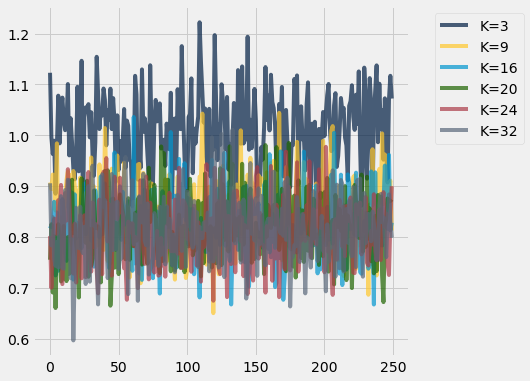

In [23]:
k_table = Table.from_df(choose_best_k)
k_table.plot()

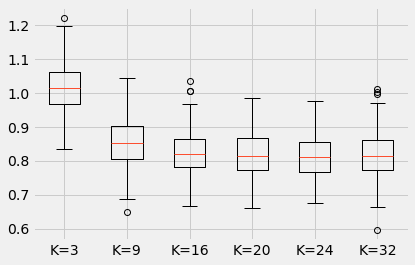

In [24]:
k_table.boxplot()

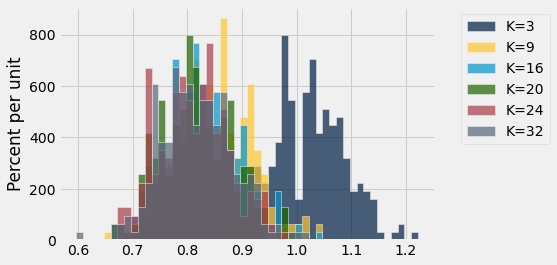

In [25]:
k_table.hist(bins=50)

In [26]:
k_table.mean()

K=3,K=9,K=16,K=20,K=24,K=32
1.01345,0.852517,0.82506,0.817702,0.81169,0.816658


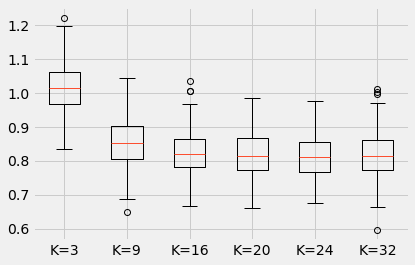

In [27]:
k_table.boxplot()

In [28]:
trials=250
choose_best_k_2 = pd.DataFrame([
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=4), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=8), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=16), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=32), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=64), housing_arr, trials)
             ]).T
choose_best_k_2.columns = ['K=4', 'K=8', 'K=16', 'K=32', 'K=64']

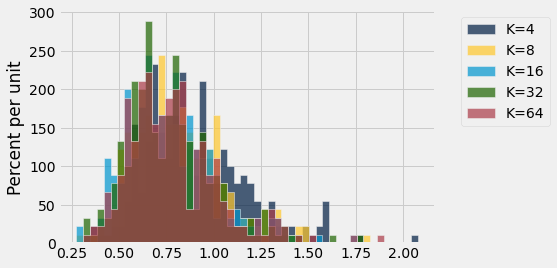

In [29]:
k_table_2 = Table.from_df(choose_best_k_2)
k_table_2.hist(bins=50)

In [30]:
k_table_2.mean()

K=4,K=8,K=16,K=32,K=64
0.905575,0.819949,0.772294,0.77156,0.788576
